In [1]:
import numpy as np
import mlcroissant as mlc
import pandas as pd

# Fetch the Croissant JSON-LD
croissant_dataset = mlc.Dataset('https://www.kaggle.com/datasets/vincentcornlius/sales-orders/croissant/download')
# Check what record sets are in the dataset
record_sets = croissant_dataset.metadata.record_sets
print(record_sets)

# Fetch the records and put them in a DataFrame
record_set_df = pd.DataFrame(croissant_dataset.records(record_set=record_sets[0].uuid))
record_set_df.head()

'''
file_path = "./Dataset/sales_data.csv"
Df = pd.read_csv(file_path)
df = Df.copy()
df'''

  -  [Metadata(sales orders)] Property "http://mlcommons.org/croissant/citeAs" is recommended, but does not exist.


[RecordSet(uuid="sales_data.csv")]


'\n# Fetch the records and put them in a DataFrame\nrecord_set_df = pd.DataFrame(croissant_dataset.records(record_set=record_sets[0].uuid))\nrecord_set_df.head()\nfile_path = "./Dataset/sales_data.csv"\nDf = pd.read_csv(file_path)\ndf = Df.copy()\ndf'

In [2]:
record_set_df.head()

,sales_data.csv/Order+Date,sales_data.csv/Order+ID,sales_data.csv/Product,sales_data.csv/Product_ean,sales_data.csv/cat%C3%A9gorie,sales_data.csv/Purchase+Address,sales_data.csv/Quantity+Ordered,sales_data.csv/Price+Each,sales_data.csv/Cost+price,sales_data.csv/turnover,sales_data.csv/margin
0,2019-01-22 21:25:00,b'141234',b'iPhone',5.638009e+12,b'V\xc3\xaatements',"b'944 Walnut St, Boston, MA 02215'",1,700.00,231.0000,700.00,469.0000
1,2019-01-28 14:15:00,b'141235',b'Lightning Charging Cable',5.563320e+12,b'Alimentation',"b'185 Maple St, Portland, OR 97035'",1,14.95,7.4750,14.95,7.4750
2,2019-01-17 13:33:00,b'141236',b'Wired Headphones',2.113973e+12,b'V\xc3\xaatements',"b'538 Adams St, San Francisco, CA 94016'",2,11.99,5.9950,23.98,11.9900
3,2019-01-05 20:33:00,b'141237',b'27in FHD Monitor',3.069157e+12,b'Sports',"b'738 10th St, Los Angeles, CA 90001'",1,149.99,97.4935,149.99,52.4965
4,2019-01-25 11:59:00,b'141238',b'Wired Headphones',9.692681e+12,b'\xc3\x89lectronique',"b'387 10th St, Austin, TX 73301'",1,11.99,5.9950,11.99,5.9950


In [47]:
df = record_set_df.copy()

In [48]:
df = df.rename(columns={"sales_data.csv/Order+Date": "OrderDate" , "sales_data.csv/Order+ID" : "OrderID", "sales_data.csv/Product":"Product",
                        "sales_data.csv/Product_ean":"Product_ean", "sales_data.csv/cat%C3%A9gorie":"Category", "sales_data.csv/Purchase+Address":"PurchaseAddress",
                        "sales_data.csv/Quantity+Ordered":"QuantityOrdered", "sales_data.csv/Price+Each":"PriceEach", "sales_data.csv/Cost+price":"CostPrice", "sales_data.csv/turnover":"turnover",
                        "sales_data.csv/margin":"Margin"})

print(df.dtypes)

OrderDate          datetime64[ns]
OrderID                    object
Product                    object
Product_ean               float64
Category                   object
PurchaseAddress            object
QuantityOrdered             int64
PriceEach                 float64
CostPrice                 float64
turnover                  float64
Margin                    float64
dtype: object


In [61]:
df['x'] = df['Category'] + str(df['Product'])
df['x']

0         Vêtements0                             b'iPhon...
1         Alimentation0                             b'iP...
2         Vêtements0                             b'iPhon...
3         Sports0                             b'iPhone'\...
4         Électronique0                             b'iP...
                                ...                        
185945    Électronique0                             b'iP...
185946    Électronique0                             b'iP...
185947    Alimentation0                             b'iP...
185948    Alimentation0                             b'iP...
185949    Électronique0                             b'iP...
Name: x, Length: 185950, dtype: object

In [60]:
df.drop(columns=['x'], inplace=True)
df

,OrderDate,OrderID,Product,Product_ean,Category,PurchaseAddress,QuantityOrdered,PriceEach,CostPrice,turnover,Margin
0,2019-01-22 21:25:00,b'141234',b'iPhone',5.638009e+12,Vêtements,"b'944 Walnut St, Boston, MA 02215'",1,700.00,231.0000,700.00,469.0000
1,2019-01-28 14:15:00,b'141235',b'Lightning Charging Cable',5.563320e+12,Alimentation,"b'185 Maple St, Portland, OR 97035'",1,14.95,7.4750,14.95,7.4750
2,2019-01-17 13:33:00,b'141236',b'Wired Headphones',2.113973e+12,Vêtements,"b'538 Adams St, San Francisco, CA 94016'",2,11.99,5.9950,23.98,11.9900
3,2019-01-05 20:33:00,b'141237',b'27in FHD Monitor',3.069157e+12,Sports,"b'738 10th St, Los Angeles, CA 90001'",1,149.99,97.4935,149.99,52.4965
4,2019-01-25 11:59:00,b'141238',b'Wired Headphones',9.692681e+12,Électronique,"b'387 10th St, Austin, TX 73301'",1,11.99,5.9950,11.99,5.9950
...,...,...,...,...,...,...,...,...,...,...,...
185945,2019-12-11 20:58:00,b'319666',b'Lightning Charging Cable',6.545974e+12,Électronique,"b'14 Madison St, San Francisco, CA 94016'",1,14.95,7.4750,14.95,7.4750
185946,2019-12-01 12:01:00,b'319667',b'AA Batteries (4-pack)',5.352480e+12,Électronique,"b'549 Willow St, Los Angeles, CA 90001'",2,3.84,1.9200,7.68,3.8400
185947,2019-12-09 06:43:00,b'319668',b'Vareebadd Phone',2.674213e+12,Alimentation,"b'273 Wilson St, Seattle, WA 98101'",1,400.00,132.0000,400.00,268.0000
185948,2019-12-03 10:39:00,b'319669',b'Wired Headphones',5.216304e+12,Alimentation,"b'778 River St, Dallas, TX 75001'",1,11.99,5.9950,11.99,5.9950


In [98]:
ndf = df[['Product','Category','PriceEach','QuantityOrdered']].copy()
mdf = ndf.groupby('Product')[['QuantityOrdered']].agg(["count","sum","max","min"]).copy()
mdf.columns = ['_'.join(col) if isinstance(col, tuple) else col for col in mdf.columns]
pdf = pd.merge(ndf, mdf, on="Product")
pdf['Sales'] = pdf.QuantityOrdered_sum * pdf.PriceEach
pdf



,Product,Category,PriceEach,QuantityOrdered,QuantityOrdered_count,QuantityOrdered_sum,QuantityOrdered_max,QuantityOrdered_min,Sales
0,b'iPhone',Vêtements,700.00,1,6842,6849,2,1,4794300.00
1,b'Lightning Charging Cable',Alimentation,14.95,1,21658,23217,4,1,347094.15
2,b'Wired Headphones',Vêtements,11.99,2,18882,20557,4,1,246478.43
3,b'27in FHD Monitor',Sports,149.99,1,7507,7550,2,1,1132424.50
4,b'Wired Headphones',Électronique,11.99,1,18882,20557,4,1,246478.43
...,...,...,...,...,...,...,...,...,...
185945,b'Lightning Charging Cable',Électronique,14.95,1,21658,23217,4,1,347094.15
185946,b'AA Batteries (4-pack)',Électronique,3.84,2,20577,27635,7,1,106118.40
185947,b'Vareebadd Phone',Alimentation,400.00,1,2065,2068,2,1,827200.00
185948,b'Wired Headphones',Alimentation,11.99,1,18882,20557,4,1,246478.43


<Axes: xlabel='Product'>

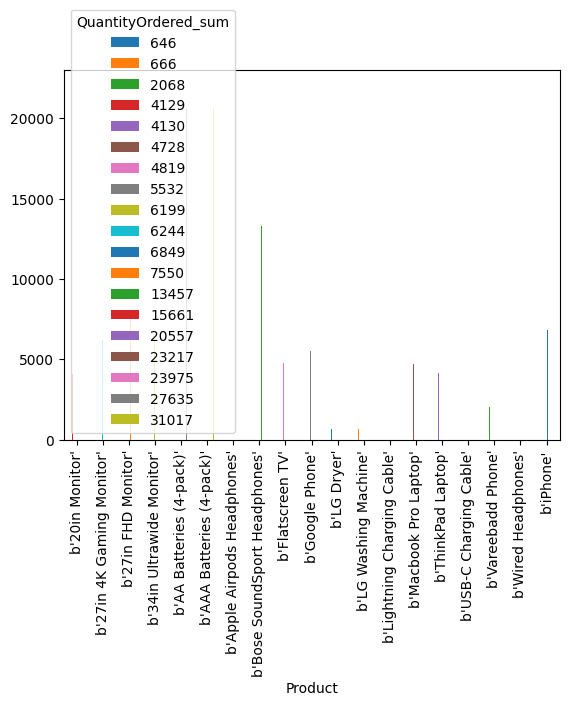

In [110]:
pdf.groupby(['Product', 'QuantityOrdered_sum']).size().unstack(fill_value=0).plot.bar()